# Introduction to Data Science and Machine Learning

<p align="center">
    <img width="699" alt="image" src="https://user-images.githubusercontent.com/49638680/159042792-8510fbd1-c4ac-4a48-8320-bc6c1a49cdae.png">
</p>

---

## KNN and Linear regression - Homework

Here a couple of exercises to better fix in your mind the working schemas of KNN and Linear Regression algorithms.

### KNN

#### Exercise 1

> Use $k$NN just implemented to solve a classification problem. (_e.g._ the notorious Iris classification problem).

##### Import data

In [1]:
# I imported data for you. Your are welcome! 🙂
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = "retina"
plt.rcParams['figure.figsize'] = (15.0, 10.0)

data = load_iris()
data_df = load_iris(as_frame=True)
df = data_df['data']
df['Species'] = data_df['target'].values

X = data['data']
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y)

print(f"Dataset is made by {len(X)} data, whose first 5 lines are \n {X[:5]} \n ")
print(f"Target vector is {len(y)}-long, and targets names are \n {data['target_names']}")

Dataset is made by 150 data, whose first 5 lines are 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]] 
 
Target vector is 150-long, and targets names are 
 ['setosa' 'versicolor' 'virginica']


The goal is quite straightforward: we have couples of data and labels and we want to classify new flowers.

Let's take a test sample, _e.g._

In [2]:
new_flowers = np.array([[5, 3, 1.2, 0.4],
                        [4.3, 2.9, 1, 0.1],
                        [5.4, 3. , 4.5, 1.5]])

Before training the model, let's plot data.

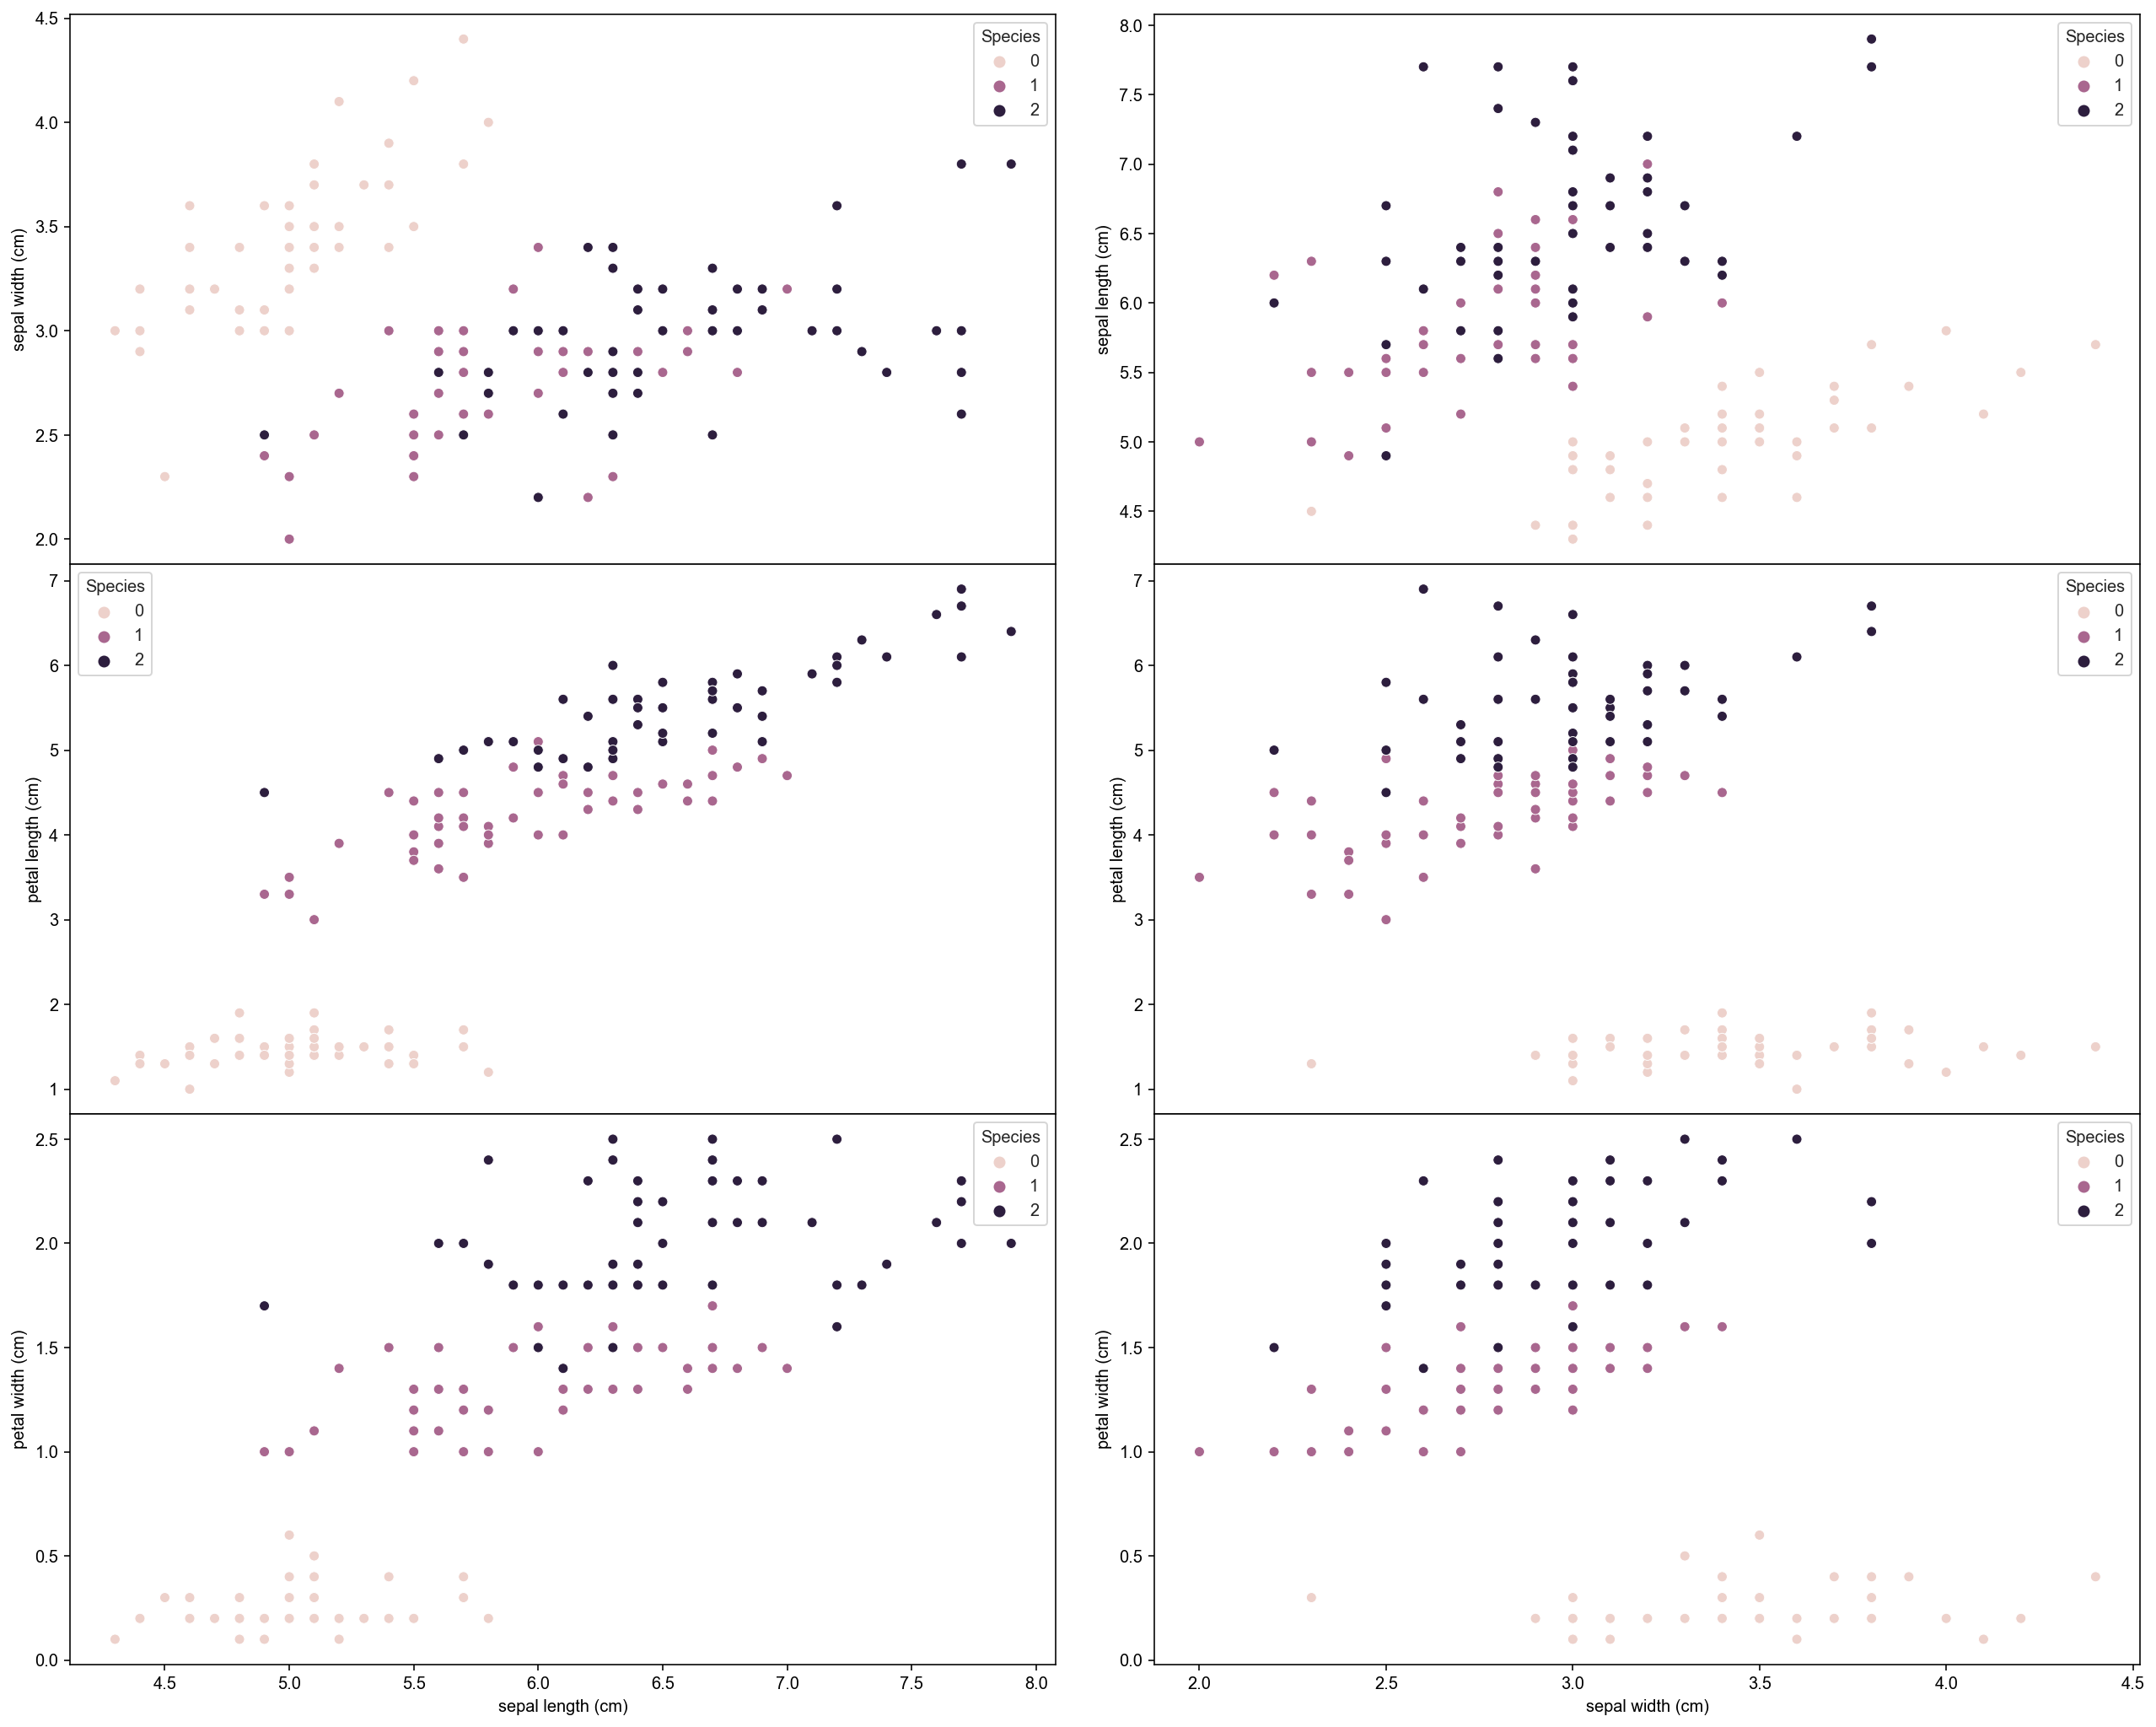

In [3]:
#create a figure "fig" with axis "ax1" with 3x2 configuration
fig, ax1 = plt.subplots(3,2, sharex='col', figsize=(22,18), gridspec_kw={'hspace': 0, 'wspace': 0.1}) 


# 1st plot
sns.set_style("whitegrid");
sns.scatterplot(data=data_df['data'], x="sepal length (cm)", y="sepal width (cm)", hue="Species", ax=ax1[0, 0], legend='brief') 

# 2nd plot
sns.scatterplot(data=data_df['data'], x="sepal width (cm)", y="sepal length (cm)", hue="Species", ax=ax1[0, 1], legend='brief') 

# 3rd plot
sns.scatterplot(data=data_df['data'], x="sepal length (cm)", y="petal length (cm)", hue="Species", ax=ax1[1, 0], legend='brief') 

# 4th plot
sns.scatterplot(data=data_df['data'], x="sepal width (cm)", y="petal length (cm)", hue="Species", ax=ax1[1, 1], legend='brief') 

# 5th
sns.scatterplot(data=data_df['data'], x="sepal length (cm)", y="petal width (cm)", hue="Species", ax=ax1[2, 0], legend='brief') 

# 6th
sns.scatterplot(data=data_df['data'], x="sepal width (cm)", y="petal width (cm)", hue="Species", ax=ax1[2, 1], legend='brief');

# fig.savefig("/figures/output.png")

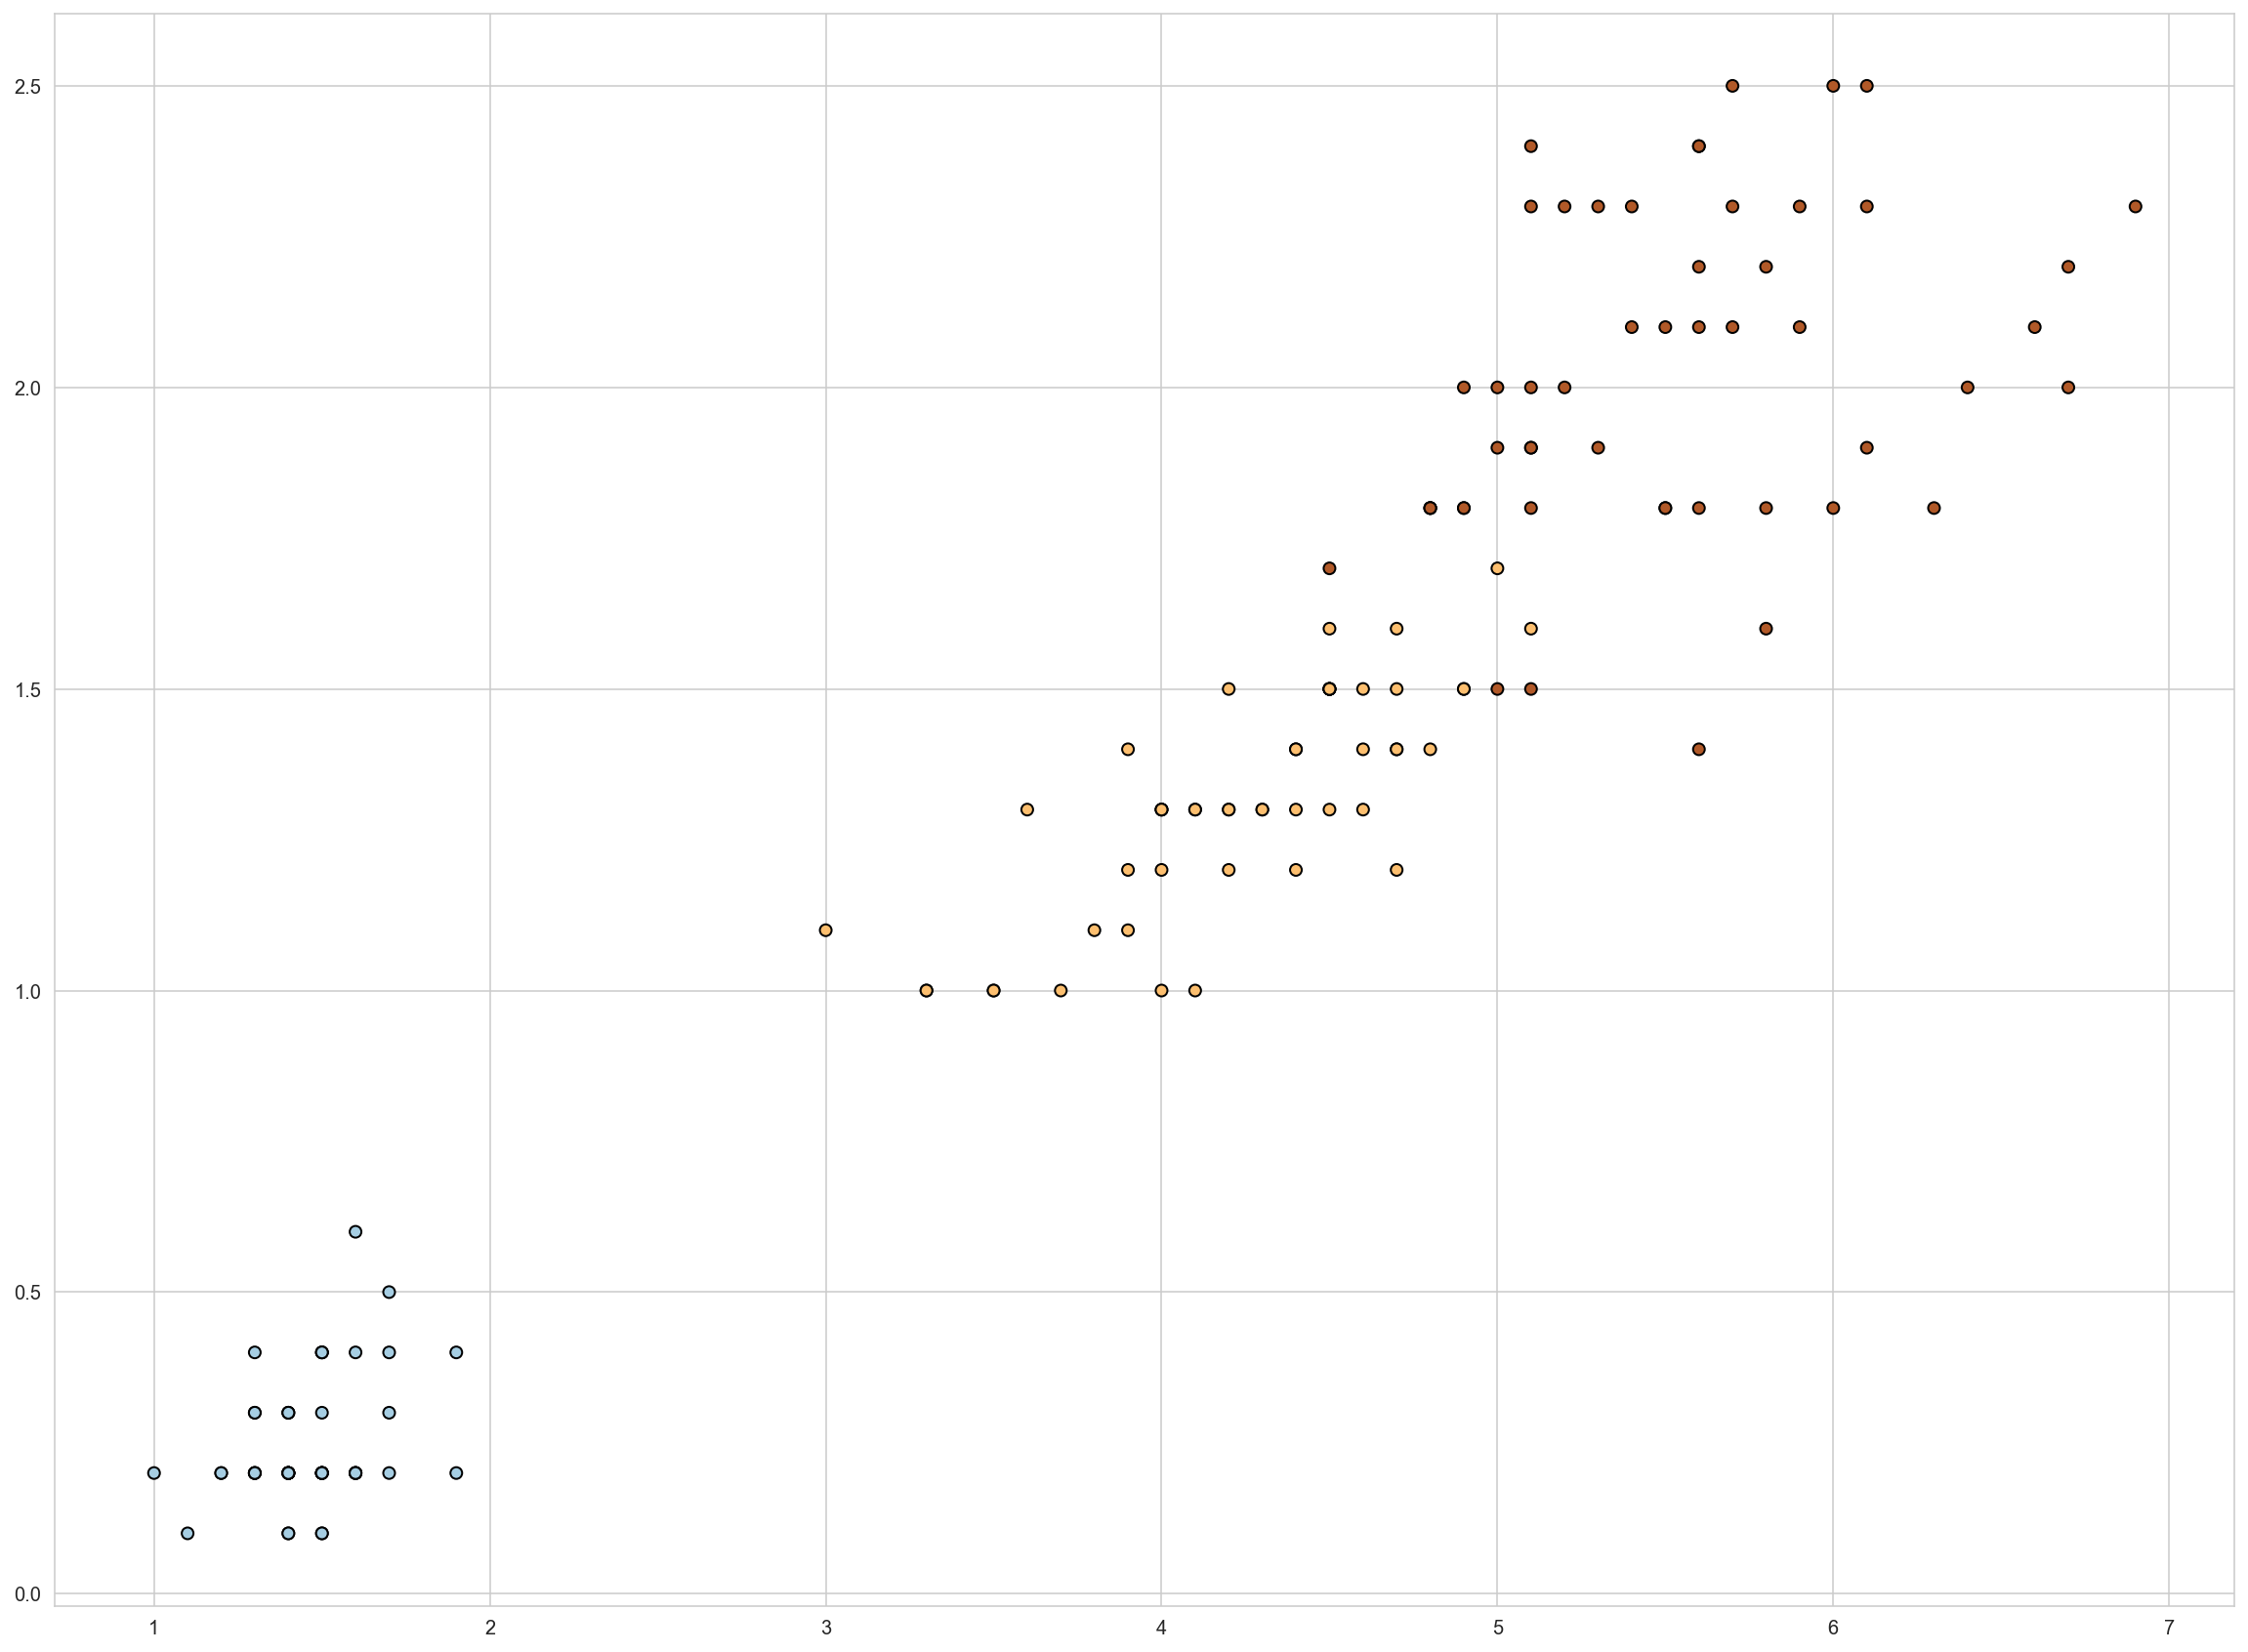

In [4]:
plt.figure(figsize=(20,15))
plt.scatter(X[:, 2], X[:, 3], c=y, edgecolors='k', cmap=plt.cm.Paired);

Now, we can train our model over data.

First, we need to make a choice for $k$. Usually it is an odd natural number.

Recall that a choice of a too small $k$ can lead to unstable decision boundaries.
There is no statistical method telling you which is the optimal choice for $k$, however, if you want to read more about this, a good place to start is [this nice post](https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb#:~:text=The%20optimal%20K%20value%20usually,be%20aware%20of%20the%20outliers.).

Our method is the following:

1. Split the dataset into train and test with proportion $85/15$.
2. Evaluate the _accuracy_ (percentage of correctly classified flowers in the test set) for different $k$.
3. Pick the highest score one.

In [8]:
k_list = [5, 7, 9]

scores = []
for k in k_list:
    model = KNeighborsClassifier(n_neighbors=k, metric="cosine")
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

print(f"The best choice for k is {k_list[np.argmax(scores)]}, with an accuracy of {np.max(scores)}")

The best choice for k is 5, with an accuracy of 1.0


In [11]:
class Quadrato():
    
    def __init__(self, lato):
        self.lato = lato
        
    def area(self):
        return self.lato**2
    
    def multiply_lato(self, factor):
        return factor*self.lato

In [12]:
quadrato_lato_5 = Quadrato(lato = 5)

quadrato_lato_5.multiply_lato(2)

10

In [13]:
model = KNeighborsClassifier(n_neighbors=5, metric="cosine")
model.fit(X_train, y_train)
model.predict(new_flowers)

array([0, 0, 1])

#### Exercise 2

> Apply $k$NN to the [wave energy outputs regression problem](https://archive.ics.uci.edu/ml/datasets/Wave+Energy+Converters#) with a big dataset. Use different metrics and compare numerical performances.

In [18]:
%%bash
wget https://archive.ics.uci.edu/ml/machine-learning-databases/00494/WECs_DataSet.zip
unzip WECs_DataSet.zip

--2022-04-12 15:19:39--  https://archive.ics.uci.edu/ml/machine-learning-databases/00494/WECs_DataSet.zip
Risoluzione di archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connessione a archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 200 OK
Lunghezza: 58633205 (56M) [application/x-httpd-php]
Salvataggio in: «WECs_DataSet.zip»

     0K .......... .......... .......... .......... ..........  0%  147K 6m30s
    50K .......... .......... .......... .......... ..........  0%  295K 4m52s
   100K .......... .......... .......... .......... ..........  0% 14,9M 3m15s
   150K .......... .......... .......... .......... ..........  0% 18,6M 2m27s
   200K .......... .......... .......... .......... ..........  0%  298K 2m36s
   250K .......... .......... .......... .......... ..........  0% 11,6M 2m11s
   300K .......... .......... .......... .......... ..........  0% 24,0M 1m52s
   350K .......... .......... ...

Archive:  WECs_DataSet.zip
   creating: WECs_DataSet/
  inflating: WECs_DataSet/Adelaide_Data.csv  
  inflating: WECs_DataSet/Perth_Data.csv  
  inflating: WECs_DataSet/Sydney_Data.csv  
  inflating: WECs_DataSet/Tasmania_Data.csv  


In [21]:
df = pd.read_csv("./WECs_DataSet/Sydney_Data.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,127.9439,264.9656,68.3481,521.7570,443.6997,195.9648,166.7701,504.2850,104.0226,205.2257,...,92861.7375,84584.2549,89041.0312,87204.4296,97380.7385,94753.7880,81677.9764,103129.6938,97196.8128,1463622.174
1,500.4677,278.6497,47.4062,417.3653,551.7083,401.1797,0.0000,161.7773,368.1543,45.9850,...,83029.8436,91483.7433,93748.1139,99467.6415,95935.6597,84254.7876,93786.3095,94499.4790,88941.7152,1489888.502
2,511.7510,104.4383,566.0000,380.4079,345.8587,0.0000,90.5588,7.2899,566.0000,566.0000,...,91309.1752,107598.5159,101897.2685,100876.0477,79350.0981,100060.2964,92733.9494,100646.9126,83394.8729,1495035.934
3,19.6990,216.4378,355.2960,67.8151,518.7256,72.1572,222.7933,223.9242,566.0000,312.4474,...,92083.6042,103182.5412,80688.8463,92306.4190,106440.6778,102118.7041,99295.1266,96503.3818,77942.2947,1459841.498
4,0.0000,0.0000,243.3420,0.0000,566.0000,0.0000,198.4878,0.0000,566.0000,566.0000,...,85602.1738,98370.5585,97148.3728,95775.0777,80723.5930,95865.7812,88525.7698,94546.5417,85021.1027,1475765.923


The dataset is a bit obscure, hence some google research might turn useful here.

In any case, we know from dataset description that the last column corresponds to the target variable.

In [35]:
X = df.loc[:, df.columns[:17]].values
y = df[df.columns[-1]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(64800, 48)
(7200, 48)
(64800,)
(7200,)


Here we simply have to explore the numerical performances with different metrics.

In [43]:
%%time
knn = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
knn.predict(X_test)

CPU times: user 11.5 s, sys: 5.03 s, total: 16.5 s
Wall time: 9.12 s


array([1511824.2972, 1487274.6674, 1499234.0472, ..., 1470693.1176,
       1479928.3498, 1489013.1506])

In [44]:
%%time
knn = KNeighborsRegressor(n_neighbors=5, metric='cosine')
knn.fit(X_train, y_train)
knn.predict(X_test)

CPU times: user 11.1 s, sys: 5.13 s, total: 16.2 s
Wall time: 8.76 s


array([1513585.5416, 1487274.6674, 1499234.0472, ..., 1470693.1176,
       1479928.3498, 1475268.2806])

In [45]:
%%time
knn = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn.fit(X_train, y_train)
knn.predict(X_test)

CPU times: user 26.6 s, sys: 2.91 s, total: 29.5 s
Wall time: 29.7 s


array([1512296.1866, 1490759.6746, 1500834.3252, ..., 1462139.488 ,
       1479928.3498, 1491374.174 ])

__Extra__: User defined metric.

There is a nice way to define your own metric (thorugh a python function) and use that one in Knn.

In [46]:
%%time
# Define your metric
def my_metric(x, y):
    if np.array_equal(x, y):
        return 0
    else:
        return 1

model = KNeighborsRegressor(n_neighbors=3, metric=my_metric)
model.fit(X_train, y_train)
model.predict(X_test)

CPU times: user 30min 23s, sys: 4.92 s, total: 30min 28s
Wall time: 30min 31s


array([1487513.08266667, 1479557.54566667, 1482563.19066667, ...,
       1473527.84166667, 1477599.07466667, 1482563.19066667])

### Linear Regression

#### Exercise 1

Is there a relationship between water salinity & water temperature? Can you predict the water temperature based on salinity? 

1. Using data contained in this [csv](https://www.kaggle.com/sohier/calcofi#bottle.csv) try to give an answer to this question.

2. Knowing that we have to find the _minimun_ of the cost function with respect to $\beta$ and that $ \partial_\beta J(\beta) = 0 $ is an equation in $\beta$. Use linear algebra to find the right coefficients $\beta$ without any loop calculation.

3. Use the equation found above to (re-)calculate $\beta$ and compare with the gradient descent and `sklearn` results.

_Hint for point 2._ Recall that one may use matrix notation to write
$$ \partial_\beta J(\beta) = X^t(X\beta - y) $$

#### Exercise 2

For example, we want to study the trend of fuel consumption as a function of the engine capacity, we can collect our measures in a table like the following.

| Engine capacity (cm$^3$) | Average Consumption (l/100km) |
|---|----|
| $800$  |  $6$    | 
| $1000$ |  $7.5$  | 
| $1100$ |  $8$    | 
| $1200$ |  $8.7$  | 
| $1600$ |  $12.4$ | 
| $2000$ |  $16$   | 
| $3000$ |  $20$   | 
| $4500$ |  $28$   | 

Apply linear regression to find the average consumption of an engine with `test_capacity = 1800`.

Use both `sklearn` library and your defined functions and compare the results.

_Hint for data conversion._ Recall that one may use pandas and python dictionaries to create dataframes.

```python
measures = pd.DataFrame({'Consumption_avg': [6, 7.5, 8, 8.7, 12.4, 16, 20, 28], 
                         'Capacity': [800, 1000, 1100, 1200, 1600, 2000, 3000, 4500]})
```